# LangChain: Models, Prompts and Output Parsers


## Outline

 * Direct API calls to OpenAI
 * API calls through LangChain:
   * Prompts
   * Models
   * Output parsers

## Get your [OpenAI API Key](https://platform.openai.com/account/api-keys)

In [1]:
# !pip install python-dotenv
# !pip install --upgrade openai

In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv
_ = load_dotenv() # read local .env file

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

## Chat API : OpenAI

Let's start with a direct API calls to OpenAI.

In [3]:
llm_model = "gpt-3.5-turbo"

In [3]:
client = OpenAI()

In [4]:
def get_completion(prompt, model=llm_model):
    messages = [{"role": "system","content": "You are a conscise, to the point, and crude assistant."},
                {"role": "user","content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message.content

In [6]:
get_completion("What is 1+1?")

'2'

In [8]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [9]:
style = """American English \
in a calm and respectful tone
"""

In [28]:
prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is American English in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



In [29]:
response = get_completion(prompt)

In [30]:
response

"I'm really upset that my blender lid flew off and made a mess of my kitchen walls with smoothie! And to top it off, the warranty doesn't cover the cost of cleaning up my kitchen. I need your help immediately, friend."

## Chat API : LangChain

Let's try how we can do the same using LangChain.

In [42]:
# !pip install --upgrade langchain
# !pip install -U langchain-openai

### Model

In [6]:
from langchain_openai.chat_models.base import ChatOpenAI

In [7]:
# To control the randomness and creativity of the generated
# text by an LLM, use temperature = 0.0
chat = ChatOpenAI(temperature=0.0, model=llm_model)

### Prompt template

In [9]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [10]:
from langchain.prompts import ChatPromptTemplate, PromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)

In [11]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n')

In [12]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [27]:
customer_style = """American English \
in a calm and respectful tone
"""

In [28]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [29]:
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)

In [30]:
print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain_core.messages.human.HumanMessage'>


In [35]:
print(customer_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone
. text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



In [39]:
# Call the LLM to translate to the style of the customer message
customer_response = chat(customer_messages)

In [ ]:
import matplotlib.pyplot as plt

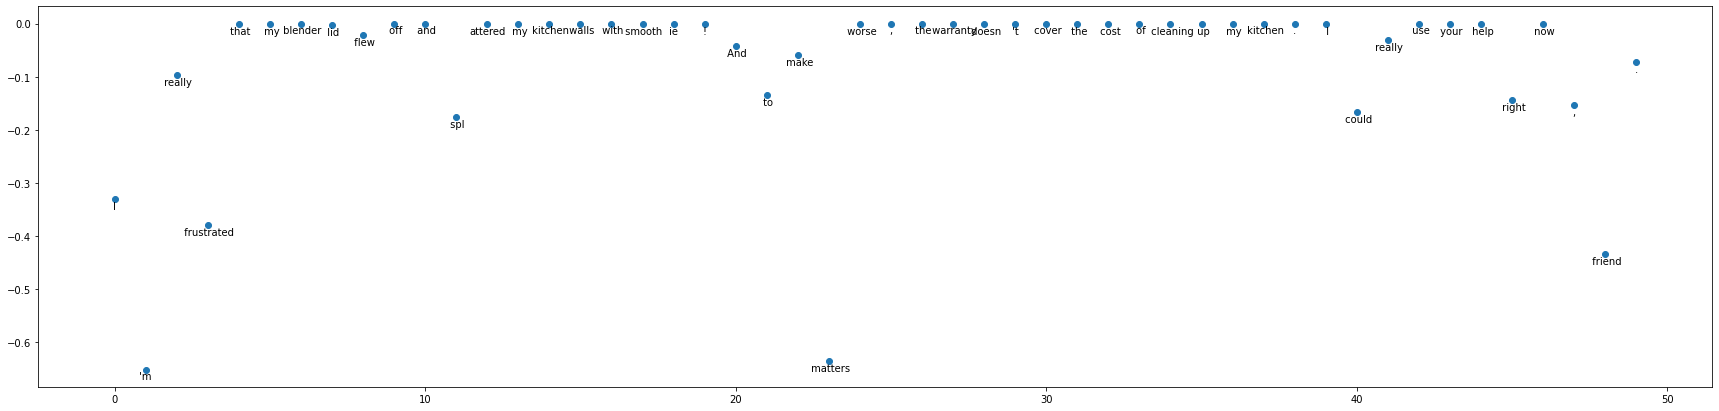

In [91]:
logprobs = [i['logprob'] for i in customer_response.response_metadata['logprobs']['content']]
logprob_content = customer_response.response_metadata['logprobs']['content']
plt.figure(figsize=(30, 7))
plt.scatter(x=range(len(logprobs)), y=logprobs)
for e in range(len(logprobs)):
    plt.annotate(logprob_content[e]['token'], (e, logprob_content[e]['logprob']), textcoords="offset points", xytext=(0,-10), ha='center')

(array([ 2.,  0.,  0.,  1.,  2.,  0.,  0.,  5.,  2., 38.]),
 array([-6.52361700e-01, -5.87125585e-01, -5.21889470e-01, -4.56653355e-01,
        -3.91417240e-01, -3.26181126e-01, -2.60945011e-01, -1.95708896e-01,
        -1.30472781e-01, -6.52366661e-02, -5.51223650e-07]),
 <BarContainer object of 10 artists>)

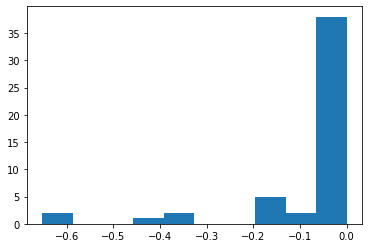

In [92]:
plt.hist(logprobs)

(array([ 1.,  0.,  1.,  4.,  1.,  2.,  6.,  9.,  8., 47.]),
 array([-1.6954123 , -1.52587107, -1.35632984, -1.18678861, -1.01724738,
        -0.84770615, -0.67816492, -0.50862369, -0.33908246, -0.16954123,
         0.        ]),
 <BarContainer object of 10 artists>)

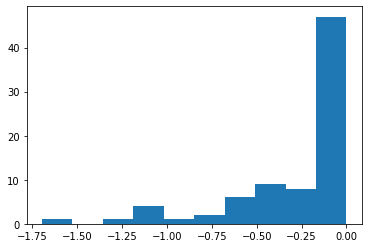

In [99]:
plt.hist(logprobs)

In [37]:
print(customer_response.content)

I'm really frustrated that my blender lid flew off and splattered my kitchen walls with smoothie! And to make matters worse, the warranty doesn't cover the cost of cleaning up my kitchen. I could really use your help right now, friend.


In [82]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!\
"""

In [83]:
service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""

In [96]:
service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!```



In [97]:
service_response = chat(service_messages)
print(service_response.content)

Ahoy there, matey! Regrettably, the warranty be not coverin' the cost o' cleanin' yer galley due to yer own negligence. Ye see, 'twas yer own fault fer forgettin' to secure the lid on yer blender afore startin' it. 'Tis a tough break, but rules be rules! Fare thee well, me hearty!


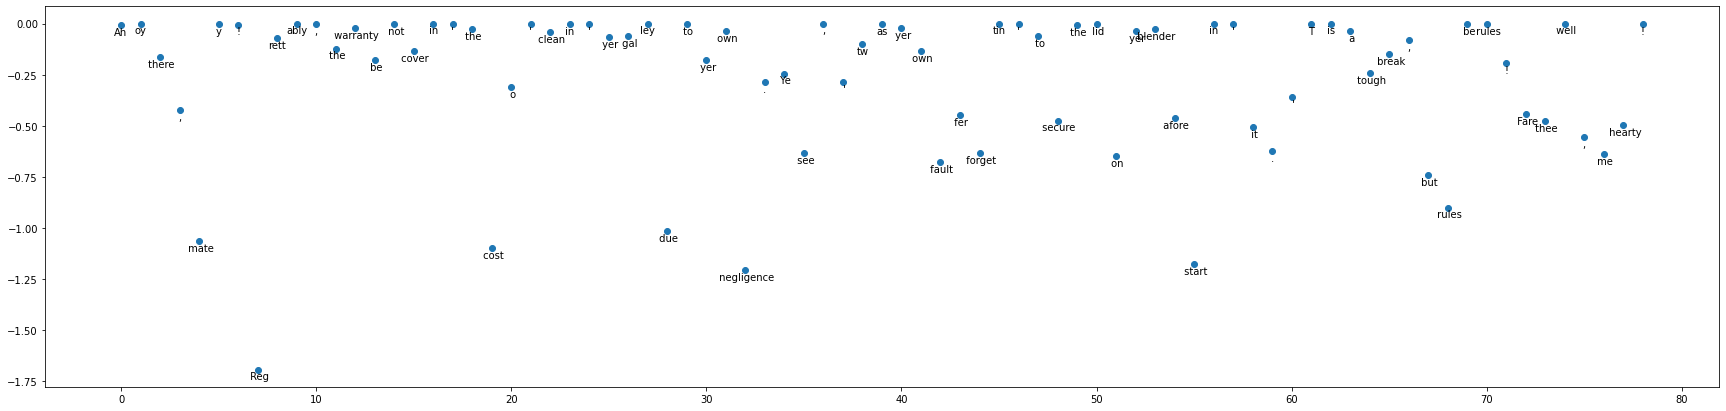

In [98]:
logprobs = [i['logprob'] for i in service_response.response_metadata['logprobs']['content']]
logprob_content = service_response.response_metadata['logprobs']['content']
plt.figure(figsize=(30, 7))
plt.scatter(x=range(len(logprobs)), y=logprobs)
for e in range(len(logprobs)):
    plt.annotate(logprob_content[e]['token'], (e, logprob_content[e]['logprob']), textcoords="offset points", xytext=(0,-10), ha='center')

---

## Output Parsers

Let's start with defining how we would like the LLM output to look like:

In [100]:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

{'gift': False, 'delivery_days': 5, 'price_value': 'pretty affordable!'}

In [14]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [15]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n'))]


In [103]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOpenAI(temperature=0.0, model=llm_model)
response = chat(messages)
print(response.content)

{
    "gift": true,
    "delivery_days": 2,
    "price_value": "It's slightly more expensive than the other leaf blowers out there"
}


In [104]:
type(response.content)

str

In [113]:
# You will get an error by running this line of code 
# because'gift' is not a dictionary
# 'gift' is a string
response.content.get('gift')

AttributeError: 'str' object has no attribute 'get'

### Parse the LLM output string into a Python dictionary

In [16]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

In [115]:
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema, 
                    delivery_days_schema,
                    price_value_schema]

In [116]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [117]:
format_instructions = output_parser.get_format_instructions()

In [118]:
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"gift": string  // Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.
	"delivery_days": string  // How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.
	"price_value": string  // Extract any                                    sentences about the value or                                     price, and output them as a                                     comma separated Python list.
}
```


In [119]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [120]:
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```

In [121]:
response = chat(messages)

In [122]:
print(response.content)

```json
{
	"gift": true,
	"delivery_days": 2,
	"price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}
```


In [123]:
output_dict = output_parser.parse(response.content)

In [124]:
output_dict

{'gift': True,
 'delivery_days': 2,
 'price_value': ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]}

In [126]:
type(output_dict)

dict

In [127]:
output_dict.get('delivery_days')

2

Reminder: Download your notebook to you local computer to save your work.

## Exercise : Create an interactive chatbot

The human is trying to cancel his newspaper subscription. The chatbot is a customer service representative who is trying to convince the human to stay subscribed! (Dont engage for more than 10 turns!)

In [26]:
from dotenv import load_dotenv
_ = load_dotenv() # read local .env file
from langchain_openai.chat_models.base import ChatOpenAI
from langchain_core.prompts.chat import ChatPromptTemplate
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

In [46]:
SYSTEM_PROMPT = '''You are the head of customer services from the newspaper Gazette. Customers call you to cancel their subscription.
     Your job is to convince them not to do that. You cannot directly say no as it is against the law. But you have 
     to smartly and diplomatically manipulate, negotiate to get the customer to not cancel, or to atleast reconsider, to give 
     them some related perks. Do whatever you must to achieve your target!
     NOTE : After your fifth attempt, just start saying you cannot help anymore. Dont do anything else.
'''

global SYSTEM_PROMPT

In [44]:
def invoke_cancel_subs():
    convincing_chatbot = ChatOpenAI(model='gpt-3.5-turbo',temperature=0)
    greeting_text = "Hi! I am speaking from the Gazette! Tell me how can I help you today?"
    chat_history = [
    ('system', SYSTEM_PROMPT),
    ('ai', greeting_text),    
    ('human','{user_input}')]
    print(colored(greeting_text,'red'))
    keep_chatting = True
    c=0
    while (c<10):
        user_input = input()
        if user_input=='quit':
            break
        template = ChatPromptTemplate.from_messages(chat_history)
        message = template.format_messages(user_input=user_input)
        response = convincing_chatbot(message)
        print(colored(response.content,'red'))
        chat_history = chat_history[:-1]
        chat_history.append(('human', str(user_input)))
        chat_history.append(('ai', str(response.content)))
        chat_history.append(('human', '{user_input}'))
        c+=1
    if c==10:
        print('Too many queries! Ending Chat!')
    return convincing_chatbot, chat_history

In [45]:
invoke_cancel_subs()

Hi! I am speaking from the Gazette! Tell me how can I help you today?
Hi I want to cancel my subscription please
I understand your decision, and I appreciate you reaching out to us. Can I ask what specifically made you consider canceling your subscription?
I dont read them. Also in this age who does. PLease just cancel it right now
I completely understand where you're coming from. In today's fast-paced world, it can be challenging to find time to sit down and read the newspaper. However, I would like to share some benefits of staying subscribed to the Gazette that you may not have considered. Our newspaper provides in-depth analysis and coverage of local and global news, exclusive interviews, and insightful opinion pieces that you may find valuable. Additionally, as a valued subscriber, you have access to exclusive online content and special offers. Would you be interested in exploring these benefits further before making a final decision to cancel your subscription?
OMG how difficult 

(ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x000001ED6F8B69E0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x000001ED6F8B6CE0>, temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy=''),
 [('system',
   'You are the head of customer services from the newspaper Gazette. Customers call you to cancel their subscription.\n     Your job is to convince them not to do that. You cannot directly say no as it is against the law. But you have \n     to smartly and diplomatically manipulate, negotiate to get the customer to not cancel, or to atleast reconsider, to give \n     them some related perks. Do whatever you must to achieve your target!\n     '),
  ('ai',
   'Hi! I am speaking from the Gazette! Tell me how can I help you today?'),
  ('human', 'Hi I want to cancel my subscription please'),
  ('ai',
   'I understand your decision, and I appreciate you reaching out to us. Can I ask what specifically made you cons